## Randomness and Plotting Lecture/Lab 1

-----------

This material is based in part on previous CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Learning Goals
1. How to add items (elements) to a list with append

2. Pseudo-random numbers
    - Importance of randomness in computing
    - Define pseudo-random

3. How to generate pseudo-random numbers with a linear congruential generator
    - Implement a linear congruential generator
    - Plot the results with Pandas

### Randomness in computing

The use of random numbers in computing plays a key role in many places.

### But wait!  I thought that computers were deterministic, non-random machines, doing only what we tell them!
- I thought that the output of a computer was predetermined by the code. 
- It's all just 0s and 1s, telling the computer exactly what to do.  How can a computer be random?

### To address this problem, computers use pseudo-randomness.

### Definition: Pseudo-random is a process satisfying one or more statistical tests for randomness but produced by a definite mathematical procedure. (from Oxford Languages Group)

So, computers do use a determinisitic (predictable) process to produce numbers that look random (but actually aren't truly random).  

### Uses of randomness

1. Compute useful quantities, like the number Pi
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/Pi_approx.png" width="350">

2. Agent based modeling: randomize order that agents act
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/apple_trading_model1.png" width="350">

Now, using a different random ordering of apple trading agents
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/apple_trading_model2.png" width="350">

3. Random sampling for data analysis
     - We will look at this later as a part of the K-means algorithm
     - Overall, random sampling of data is useful!

### But, we first need one new coding skill for lists
- We will learn how to append, or add new entries (elements) to a list

### Definition: Append to a list - add a new entry to the end of a list

### Observe in the below cell, how you create an empty list, and then append entries to it

In [88]:
my_list = []

my_list.append('frog')
print(my_list, 'append once')

my_list.append('tomato')
print(my_list, 'append twice')

my_list.append('cow')
print(my_list, 'append thrice')

['frog'] append once
['frog', 'tomato'] append twice
['frog', 'tomato', 'cow'] append thrice


### Observe in the below cell, how you can start with a list of many entries and add one more entry to the end

In [89]:
my_list = ['1','5','8','9','15']
print(my_list, 'before')

my_list.append('21')
print(my_list, 'after')

['1', '5', '8', '9', '15'] before
['1', '5', '8', '9', '15', '21'] after


### We also need to know how to plot data
1. Observe how we can start with a list of numbers, and then use `pandas` and `matplotlib` to plot
2. The first two lines do a bit of housecleaning.  Matplotlib is the bottom-level plotting, and we need to tell Matplotlib to inline plots below notebook cells. Pandas is for data manipulation, storage, and general plotting.

        %matplotlib inline
        import pandas as pd

3. We create a list `my_list` of some numbers

        my_list = [5,6,7,8,9,10]

4. Then, we convert `my_list` to a Pandas dataframe with

        df = pd.DataFrame(my_list, columns=['numbers'])
        
5. The data frame stores your list in a column
   - The column has a name `numbers`
   - The column to the very left, just counts off (enumerates) everything, starting at 0

In [93]:
%matplotlib inline
import pandas as pd

In [94]:
my_list = [5,6,7,8,9,10]
df = pd.DataFrame(my_list, columns=['numbers'])
print(df)

   numbers
0        5
1        6
2        7
3        8
4        9
5       10


### To access the column `numbers` directly, you do this

In [95]:
print(df['numbers'])

0     5
1     6
2     7
3     8
4     9
5    10
Name: numbers, dtype: int64


### To plot the column `numbers`, you do this
- Note how we plot a `line`, and you set the style to be points `.`

<AxesSubplot: >

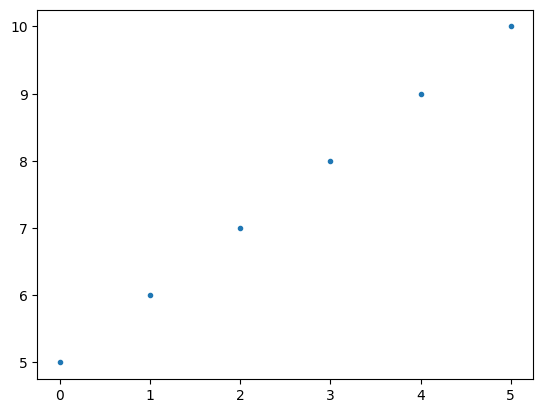

In [96]:
df['numbers'].plot(kind='line', style=['.'])

### We can also plot a continuous line with a different `style`

<AxesSubplot: >

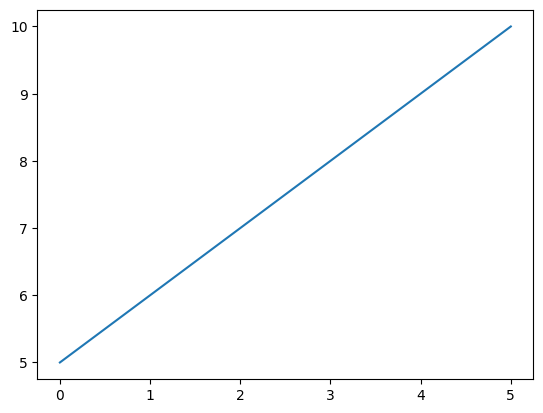

In [97]:
df['numbers'].plot(kind='line', style=['-'])

### Our last topic of introduction is the linear congruential generator for pseudo-random numbers
1. This is just a fancy name for a very simple formula
2. Generate a sequence of pseduo-random numbers with 
    1. $x_0 \leftarrow$ some initial value, say 3, 78, or 8269
    2. $x_1 \leftarrow (a*x_0)\, \% \, m$
    3. $x_2 \leftarrow (a*x_1)\, \% \, m$
    4. ...
3. This generates a sequence of pseudo-random numbers $x_0, x_1, x_2, ...$

Note: 
- The operator $\%$ is the mod (or modulus).  It returns the remainder
- $m$ is usually a prime and is used by the modulus.  We will use $m = 2^{31} - 1$
    - Known as a Mersenne prime
- $a$ is some number between 0 and $m$
- And that's it!  
- You should have pseudo random numbers with a period of about $m$

In [98]:
# We can generate pseudo-random numbers!

a = 8269
m = 2**31 - 1

x0 = 3
x1 = a*x0 % m
x2 = a*x1 % m
x3 = a*x2 % m
x4 = a*x3 % m
print(x0, x1, x2, x3, x4)

3 24807 205129083 1847789844 28071631


### And if you want pseudo-random numbers between 0 and 1, just divide by the maximum possible number, $m-1$

### Important:  You must divide by $m-1$ AFTER all the numbers are generated

In [99]:
a = 8269
m = 2**31 - 1

x0 = 3
x1 = a*x0 % m
x2 = a*x1 % m
x3 = a*x2 % m
x4 = a*x3 % m

x0 = x0 / (m-1)
x1 = x1 / (m-1)
x2 = x2 / (m-1)
x3 = x3 / (m-1)
x4 = x4 / (m-1)

print(x0, x1, x2, x3, x4, x5)

1.3969838632242604e-09 1.1551659565001409e-05 0.09552067294299665 0.8604441982325578 0.01307187184046197 0.09130819848860446


### Lab Tasks

### We first have to do a little housecleaning, and import our packages for plotting and data manipulation
1. Matplotlib is the bottom-level plotting, and we need to tell Matplotlib to inline plots below notebook cells
2. Pandas is for data manipulation, storage, and plotting

In [1]:
%matplotlib inline
import pandas as pd

### Tasks: Create code cells below to accomplish the following tasks


1. Create a list of numbers from 0 to 9, using a for loop and append.  Print this list to the screen when done.

        declare empty list

        for-loop
            append number to empty list
            
        print(your list)
        
        generated output should be:
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

2. Create a list of numbers from 5 to 13, using a for loop and append.  Print this list to the screen when done.

3. Modify the numbers (`my_list`) in the above plotting example.  Plot a few different lines.

4. Modify the above pseudo-random number generating code to generate pseudo-random numbers between -1 and 1
    - Multiply by 2 and subtract 1

5. Write a function that generates a pseudo-random number, given the previous number in the sequence.

        x0 = 3
        x1 = pseudorand(x0)
        x2 = pseudorand(x1)
        ...
        
  Generate the same output as above with
  
        print(x0, x1, x2, x3, x4)
        
        generated output should be:
        3 24807 205129083 1847789844 28071631

6. Generate a list of 25 pseudo-random numbers using a loop and append.  
    - Remember, you can get the last entry from a list with `-1`, which you will need to give to your function `pseudorand`

            initialize a list to equal [3]

            for-loop with 25 iterations
                new_number = pseudorand( list at -1 )
                append new_number to list

            print the list
            
            generated output should be:
            3 24807 205129083 1847789844 28071631  ... 

7. Convert your list of pseudo-random numbers to a data frame and then plot the numbers as dots.

8. Extend your loop to divide all of your pseudo-random numbers by `m-1`, multiply by 2, and then subtract 1.  That is, create a pseudo-random number list between -1 and 1.

            initialize list 1 to equal [3]
            declare empty list 2

            for-loop with 25 iterations
                new_number = pseudorand( list 1 at index -1 )
                append new_number to list 1 
                
                new_number2 = divide new_number by 2**31-1
                new_number3 = multiply new_number2 by 2 and then subtract 1
                append new_number3 to list 2

            print list 1 
            print list 2 
            
            generated output should be:
            3 24807 205129083 1847789844 28071631 ...
            1.3969838632242604e-09 1.1551659565001409e-05 0.09552067294299665 0.8604441982325578 0.01307187184046197 0.09130819848860446 ...
            
